In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
%matplotlib inline

In [4]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data(path="mnist.npz")

In [5]:
#Shape of Each Training Set
X_train[0].shape

(28, 28)

<Figure size 640x480 with 0 Axes>

<Figure size 50x30 with 0 Axes>

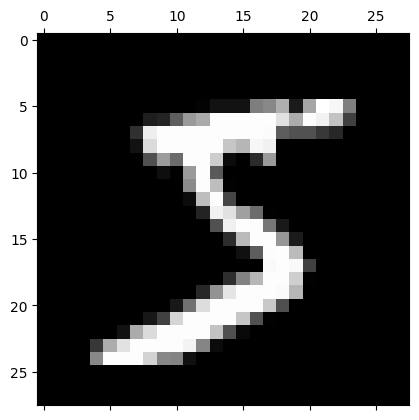

In [6]:
#Preview of each Training Set
plt.gray()
plt.figure(figsize=(0.5,0.3))
plt.matshow(X_train[0])

In [7]:
X_trainf = X_train.reshape(len(X_train),28*28)
X_testf = X_test.reshape(len(X_test),28*28)

In [8]:
y_train[0]

5

In [9]:
# Feature Scaling
xsc = MinMaxScaler()
X_trains = xsc.fit_transform(X_trainf)
X_tests = xsc.fit_transform(X_testf)

In [10]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(units= 100, activation= "relu"),
    Dense(units= 50, activation= "relu"),
    Dense(units= 10, activation= "sigmoid")
])

model.compile(
    optimizer = "adam",
    loss = "sparse_categorical_crossentropy",
    metrics= ['accuracy']

)

model.fit(X_trains,y_train,epochs= 10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8666 - loss: 0.4604
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9656 - loss: 0.1165
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9767 - loss: 0.0737
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9812 - loss: 0.0575
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9861 - loss: 0.0437
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9889 - loss: 0.0354
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9898 - loss: 0.0295
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9916 - loss: 0.0247
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9934 - loss: 0.0214
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9932 - loss: 0.0195


In [13]:
# prediction added
prediction = model.predict(X_tests)
print(prediction[15])
print(f"Number: {np.argmax(prediction[15])}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
[8.7832419e-08 4.7162659e-02 2.6019400e-03 9.7567970e-01 9.9207409e-06
 9.9999893e-01 3.0004989e-05 3.7898464e-04 4.7153295e-03 1.1615638e-03]
Number: 5


In [19]:
model.evaluate(X_tests,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9717 - loss: 0.1180


[0.09339015930891037, 0.9758999943733215]

In [14]:
# List comprehension having predicted numbers
y_predicted = [np.argmax(i) for i in prediction]
cm  = tf.math.confusion_matrix(y_test,y_predicted)

Text(0.5, 1.0, 'Confusion Matrix')

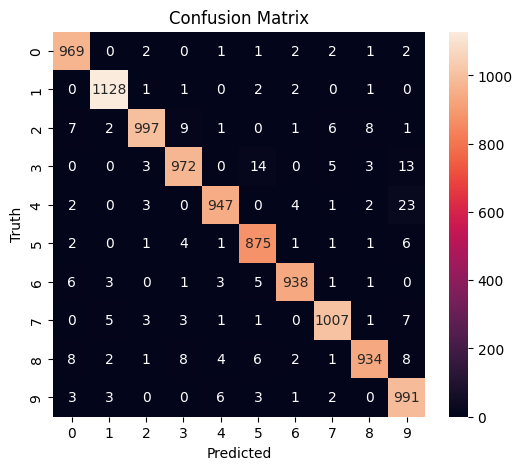

In [15]:
plt.figure(figsize=(6,5))
sns.heatmap(cm,annot = True,fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.title("Confusion Matrix")